In [ ]:
!pip install pycaret --progress-bar off
!pip install dabl --progress-bar off
!pip install shap

In [2]:
from pycaret.classification import *
import pandas as pd
import dabl as db

In [3]:
hr_data = pd.read_csv("HR Employee Attrition.csv")

In [4]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Target looks like classification
Linear Discriminant Analysis training set score: 0.502


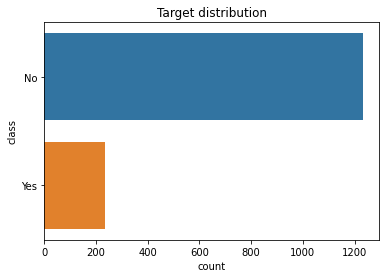

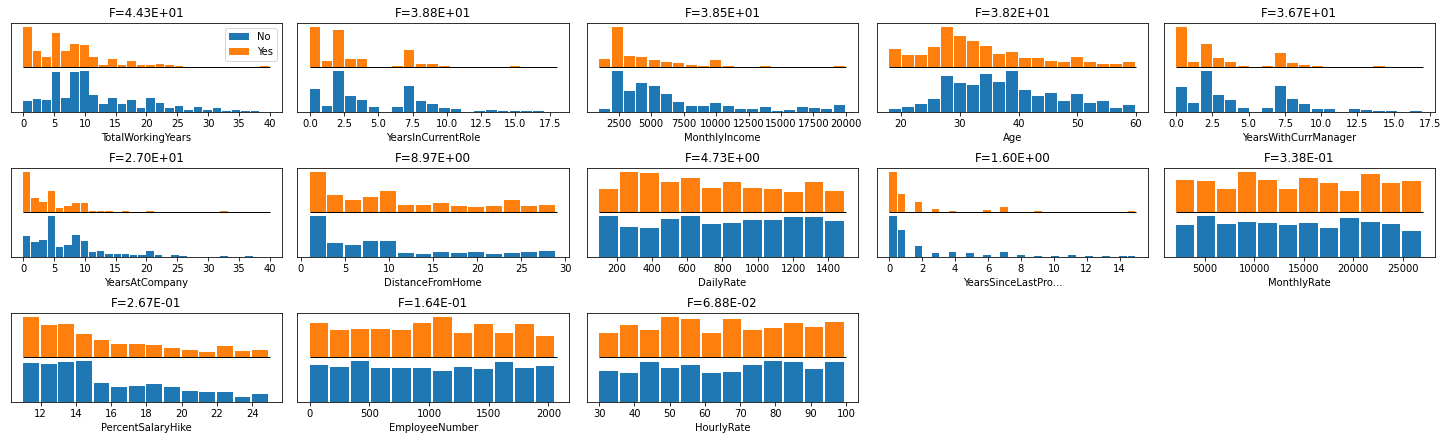

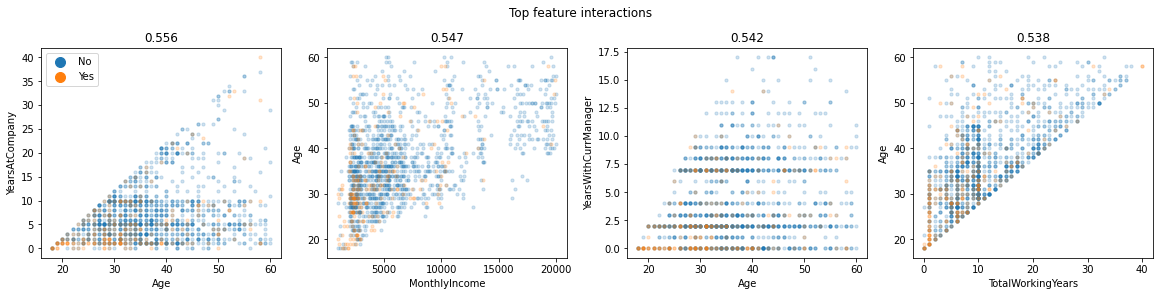

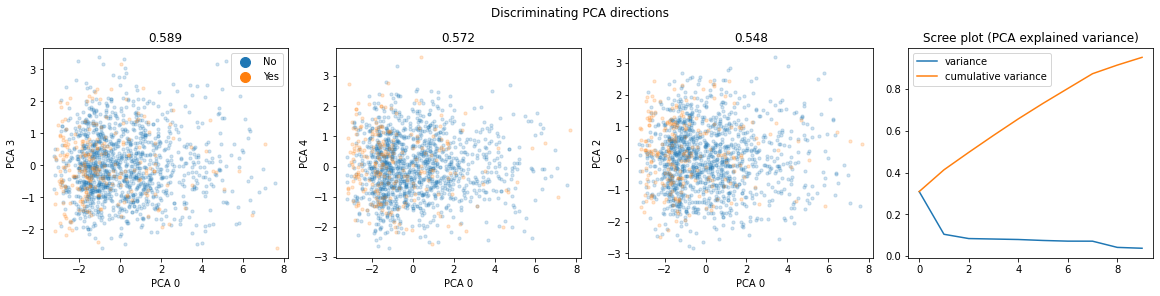

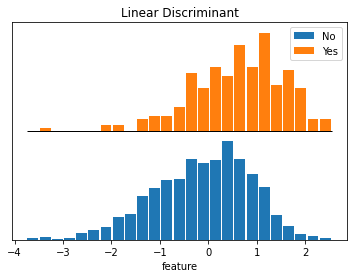

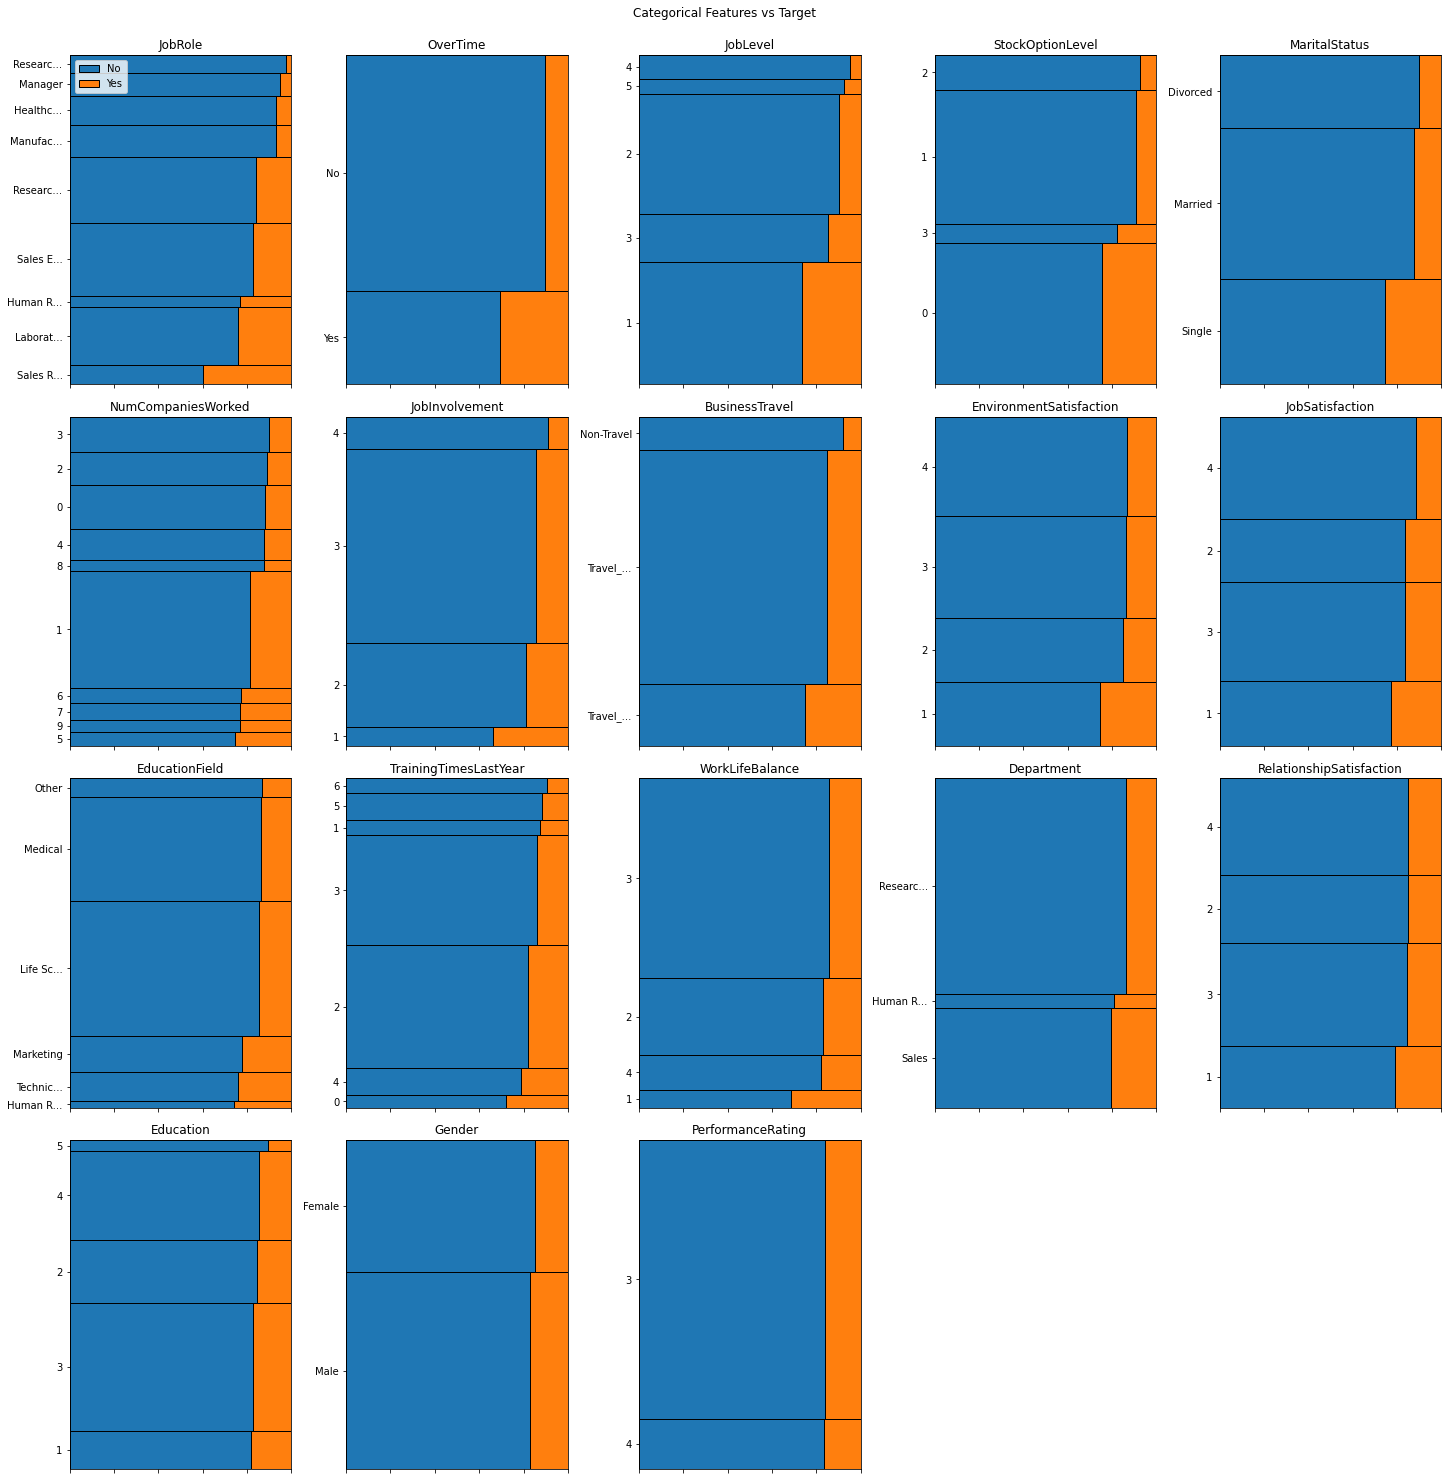

In [ ]:
db.plot(hr_data, y = "Attrition")

In [5]:
target = "Attrition"

cont_feats = ["DistanceFromHome", "EmployeeCount", "HourlyRate",
              "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike",
              "StandardHours", "TotalWorkingYears", "YearsAtCompany", "YearsSinceLastPromotion",
              "YearsWithCurrManager", "TrainingTimesLastYear"]

bin_feats = ["Age", "DailyRate", "MonthlyIncome"]

ord_feats = {"StockOptionLevel" : ["0", "1", "2", "3"],
             "EnvironmentSatisfaction" : ["1", "2", "3", "4"],
             "JobInvolvement" : ["1", "2", "3", "4"],
             "JobSatisfaction" : ["1", "2", "3", "4"],
             "Education" : ["1", "2", "3", "4", "5"],
             "PerformanceRating" : ["3", "4"],
             "RelationshipSatisfaction" : ["1", "2", "3", "4"],
             "WorkLifeBalance" : ["1", "2", "3", "4"]}

cat_feats = ["BusinessTravel", "Department", "EducationField", "JobRole",
             "Gender", "JobLevel", "JobRole", "Over18",
             "MaritalStatus", "OverTime", "WorkLifeBalance"]

ignore = ["EmployeeNumber"]

In [10]:
setup(hr_data, target = target,
      train_size = 0.7, transformation = True,
      bin_numeric_features = bin_feats,
      numeric_features = cont_feats,
      categorical_features = cat_feats,
      ordinal_features = ord_feats,
      feature_selection = True,
      feature_interaction = True,
      ignore_features = ignore,
      normalize = True, 
      normalize_method = "robust",
      combine_rare_levels = True,
      silent = True)

,Description,Value
0,session_id,4319
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(1470, 35)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,18
8,Ordinal Features,True
9,High Cardinality Features,False


(<MLUsecase.CLASSIFICATION: 1>,
 {'auc': 'AUC',
  'boundary': 'Decision Boundary',
  'calibration': 'Calibration Curve',
  'class_report': 'Class Report',
  'confusion_matrix': 'Confusion Matrix',
  'dimension': 'Dimensions',
  'error': 'Prediction Error',
  'feature': 'Feature Importance',
  'feature_all': 'Feature Importance (All)',
  'gain': 'Gain Chart',
  'learning': 'Learning Curve',
  'lift': 'Lift Chart',
  'manifold': 'Manifold Learning',
  'parameter': 'Hyperparameters',
  'pr': 'Precision Recall',
  'rfe': 'Feature Selection',
  'threshold': 'Threshold',
  'tree': 'Decision Tree',
  'vc': 'Validation Curve'},
       JobRole_Manager  ...  NumCompaniesWorked_multiply_HourlyRate
 1269              0.0  ...                               -2.355969
 1113              0.0  ...                               -0.148180
 528               0.0  ...                               -0.345033
 1208              0.0  ...                                0.285529
 1034              0.0  ...     

In [11]:
compare_models(sort = "AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8638,0.8408,0.4438,0.6468,0.5170,0.4418,0.4573,0.354
catboost,CatBoost Classifier,0.8697,0.8381,0.2644,0.8356,0.3914,0.3442,0.4180,15.219
lightgbm,Light Gradient Boosting Machine,0.8609,0.8275,0.2876,0.7263,0.3989,0.3388,0.3903,0.462
lr,Logistic Regression,0.8551,0.8233,0.5379,0.5882,0.5558,0.4699,0.4743,0.341
gbc,Gradient Boosting Classifier,0.8589,0.8109,0.3281,0.6775,0.4303,0.3620,0.3982,1.316
xgboost,Extreme Gradient Boosting,0.8619,0.8070,0.3399,0.6752,0.4411,0.3744,0.4079,1.160
et,Extra Trees Classifier,0.8551,0.8068,0.2758,0.6411,0.3835,0.3178,0.3543,0.510
lda,Linear Discriminant Analysis,0.8521,0.7951,0.4974,0.5691,0.5251,0.4389,0.4435,0.083
rf,Random Forest Classifier,0.8590,0.7886,0.2641,0.6936,0.3727,0.3148,0.3644,0.651
nb,Naive Bayes,0.6002,0.7626,0.8307,0.2738,0.4110,0.2140,0.2882,0.026


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=4319)

In [20]:
lr = create_model("lr")
ada = create_model("ada")
xgboost = create_model("xgboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8641,0.7859,0.4706,0.6154,0.5333,0.4554,0.4611
1,0.8544,0.8112,0.2353,0.6667,0.3478,0.2864,0.3361
2,0.8641,0.8064,0.2941,0.7143,0.4167,0.3545,0.3995
3,0.8641,0.8242,0.3529,0.6667,0.4615,0.3921,0.4181
4,0.8544,0.7722,0.2353,0.6667,0.3478,0.2864,0.3361
5,0.9029,0.8413,0.4706,0.8889,0.6154,0.5658,0.6033
6,0.8544,0.7709,0.2353,0.6667,0.3478,0.2864,0.3361
7,0.8447,0.8922,0.2222,0.6667,0.3333,0.2695,0.3222
8,0.8627,0.7938,0.5294,0.6000,0.5625,0.4815,0.4828
9,0.8529,0.7716,0.3529,0.6000,0.4444,0.3662,0.3833


In [15]:
calibrate_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8058,0.7250,0.2353,0.3636,0.2857,0.1793,0.1850
1,0.8835,0.7880,0.3529,0.8571,0.5000,0.4467,0.5034
2,0.8641,0.8057,0.1765,1.0000,0.3000,0.2635,0.3896
3,0.8835,0.8830,0.2941,1.0000,0.4545,0.4103,0.5080
4,0.8738,0.8317,0.3529,0.7500,0.4800,0.4186,0.4573
5,0.8738,0.8741,0.2353,1.0000,0.3810,0.3394,0.4521
6,0.8738,0.8167,0.2941,0.8333,0.4348,0.3815,0.4477
7,0.8544,0.8712,0.1667,1.0000,0.2857,0.2482,0.3764
8,0.9020,0.8208,0.4706,0.8889,0.6154,0.5652,0.6029
9,0.8627,0.8623,0.1765,1.0000,0.3000,0.2632,0.3892


CalibratedClassifierCV(base_estimator=LogisticRegression(C=1.0,
                                                         class_weight=None,
                                                         dual=False,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         l1_ratio=None,
                                                         max_iter=1000,
                                                         multi_class='auto',
                                                         n_jobs=None,
                                                         penalty='l2',
                                                         random_state=4319,
                                                         solver='lbfgs',
                                                         tol=0.0001, verbose=0,
                                             

In [14]:
calibrate_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8544,0.8454,0.1176,1.0,0.2105,0.1821,0.3165
1,0.8447,0.8434,0.0588,1.0,0.1111,0.0945,0.2227
2,0.8544,0.8605,0.1176,1.0,0.2105,0.1821,0.3165
3,0.8641,0.8564,0.1765,1.0,0.3000,0.2635,0.3896
4,0.8738,0.8666,0.2353,1.0,0.3810,0.3394,0.4521
5,0.8641,0.8837,0.1765,1.0,0.3000,0.2635,0.3896
6,0.8447,0.8044,0.0588,1.0,0.1111,0.0945,0.2227
7,0.8350,0.9379,0.0556,1.0,0.1053,0.0885,0.2152
8,0.8922,0.8291,0.3529,1.0,0.5217,0.4762,0.5590
9,0.8529,0.7896,0.1176,1.0,0.2105,0.1818,0.3162


CalibratedClassifierCV(base_estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                         base_estimator=None,
                                                         learning_rate=1.0,
                                                         n_estimators=50,
                                                         random_state=4319),
                       cv=StratifiedKFold(n_splits=10, random_state=4319, shuffle=False),
                       method='sigmoid')

In [22]:
calibrate_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8641,0.7955,0.2941,0.7143,0.4167,0.3545,0.3995
1,0.8447,0.7859,0.1765,0.6000,0.2727,0.2137,0.2647
2,0.8544,0.7975,0.2353,0.6667,0.3478,0.2864,0.3361
3,0.8641,0.8215,0.3529,0.6667,0.4615,0.3921,0.4181
4,0.8738,0.8564,0.2941,0.8333,0.4348,0.3815,0.4477
5,0.9126,0.8782,0.4706,1.0000,0.6400,0.5975,0.6527
6,0.8641,0.7606,0.2353,0.8000,0.3636,0.3120,0.3863
7,0.8350,0.8837,0.1667,0.6000,0.2609,0.2001,0.2529
8,0.8725,0.8042,0.4118,0.7000,0.5185,0.4507,0.4718
9,0.8529,0.8000,0.2941,0.6250,0.4000,0.3284,0.3588


CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1, gamma=0,
                                                    gpu_id=-1,
                                                    importance_type='gain',
                                                    interaction_constraints='',
                                                    learning_rate=0.300000012,
                                                    max_delta_step=0,
                                                    max_depth=6,
                                                    min_child_weight=1,
                                                    missing=nan,
                                                    monotone_const

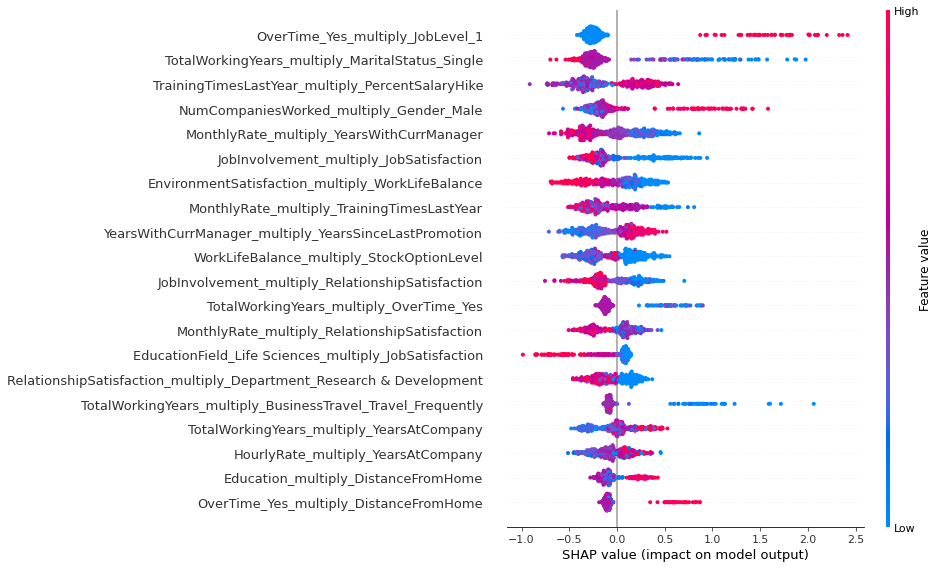

In [21]:
interpret_model(xgboost)